In [2]:
import rasterio

SyntaxError: invalid syntax (<ipython-input-2-961ba6856733>, line 1)

In [1]:
import numpy as np
from numpy import nanmedian
#from scipy.fft import fft
import math
from numpy.fft import fft, ifft, rfft, fft2, ifft2


## Função Filt5 em R

In [3]:
#' filt5
#' @description  Finds maximum of a 5x5 sliding window. If the central pixel is the maximum, this is flagged as a one. All other pixels are flagged as zero. Usually this function is not used directly.
#' @usage filt5(lon, lat, ingrid, nodata = NA)
#' @param lon longitude (vector) of the satellite image
#' @param lat latitude (vector) of the satellite image
#' @param ingrid The satellite data (matrix)
#' @param nodata value representing 'no data'
#'
#' @return returns a grid of zeros and ones
#' @seealso \code{\link{boa}}
#' @export
#'
#' @examples 
#' # none
filt5 <-
function(lon , lat, ingrid, nodata = NA){
#======================================================#
# Find peaks in 5 directions. FLag as 5
#======================================================#
 #outgrid = matrix(0,nrow=dim(ingrid)[1],ncol=dim(ingrid)[2] ) # make all zeros..
 nodatidx = ingrid[ingrid==nodata]    # creates single dim array with as much values as the matrix ingrid, with NANs
 ingrid[nodatidx] = -9999
 outgrid = ingrid*0 ## outgrid is a matrix with the shape of ingrid, full of Zeros
 l1 = length(lon)
 l2 = length(lat)
for(i in 3:(l1-2)){
 for(j in 3:(l2-2)){
   subg = ingrid[(i-2):(i+2),(j-2):(j+2)]   #results in slice with data from row i-2 to i+2 (i-2,i-1, i, i+1, i+2) (included) and columns (j-2, j-1, j, j+1, j+2)
if(sum(is.na(subg))==25){
outgrid[i,j] = 0
}else{
vec = as.vector(subg)    ## convert matrix to vector
ma = which.max(subg)
mi = which.min(subg)

   if(ma==13||mi==13){
 outgrid[i,j] = 1
}else{
  outgrid[i,j] = 0
}
}
   }
  }
 ## não tou a perceber para que serve esta parte  
outgrid[nodatidx] = nodata  
outgrid

SyntaxError: invalid syntax (2922168994.py, line 15)

## Função Filt5 em Python

Acho que está tudo correto

In [976]:
def filt5(lon, lat, ingrid, nodata=np.nan):
    """
    Find peaks in 5 directions. Flag as 5
    """
    
    nodatidx = ingrid.flatten()*np.nan ## creates single dim array with as much values as the matrix ingrid, with NANs
    outgrid = np.zeros(ingrid.shape)   ## outgrid is a matrix with the shape of ingrid, full of Zeros
    
    l1 = len(lon)
    l2 = len(lat)
    
    for i in range(3, l1-1):   #tem de ser -1 em vez de -2 
        for j in range(3, l2-1):
            subg = ingrid[(i-3):(i+2), (j-3):(j+2)] # slice with data from row (i-2,i-1, i, i+1, i+2) and columns (j-2, j-1, j, j+1, j+2)
            if np.isnan(subg).sum()==25:    #if all values in submatrix subg are null values:
                outgrid[i,j] = 0
            else:
                vec = np.array(subg).T.flatten()    ## convert matrix to vector
                ma = np.argmax(subg.flatten())
                mi = np.argmin(subg.flatten())
                
                if ma==12 or mi==12:     #se se tratar do valor meio da matrix
                    outgrid[i-1,j-1] = 1
                else:
                    outgrid[i-1,j-1] = 0
    
    return outgrid

                
                
    


## Verificação passo a passo da conversão da função filt5 de R para python

Para validar o código da função filt5 que será implementado em Python

In [975]:
#estes 3 arrays é só para validação do funcionamento do código
lon = np.array([1,2,3,4,5,6])
lat = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ingrid = np.arange(1,91).reshape(6, 15)  

nodatidx = ingrid.flatten()*np.nan      #check     -> array of NaNs with as much elements as the ingrid array
outgrid = np.zeros(ingrid.shape)        #check     -> array de 0s com shape de ingrid

l1 = len(lon)                           #check
l2 = len(lat)                           #check

for i in range(3, l1-1):   
    for j in range(3, l2-1):
        subg = ingrid[(i-3):(i+2), (j-3):(j+2)]       #check
        if np.isnan(subg).sum()==25:
            outgrid[i,j] = 0                          #check
        else:
            vec = np.array(subg).T.flatten()          #check
            ma = np.argmax(subg.flatten())            #check
            mi = np.argmin(subg.flatten())            #check
            
            if ma==12 or mi==12:                        
                outgrid[i-1,j-1] = 1                   #check
            else:
                outgrid[i-1,j-1] = 0                   #check

outgrid


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# ------------------------------------------------------------------------------------------
## Função Filt3 em R

In [544]:
#' filt3
#'
#' @param lon longitude (vector) of the satellite image
#' @param lat latitude (vector) of the satellite image
#' @param ingrid The satellite data (matrix)
#' @param grid5 results of \code{\link{filt5}}
#'
#' @return returns a median smoothed grid of satellite data
#' @seealso \code{\link{boa}}
#' @usage filt3(lon, lat, ingrid, grid5 = grid5(lon, lat, ingrid))
#' @export
#'
#' @examples
#' # none here
filt3 <-
function(lon , lat, ingrid, grid5){
#======================================================#
# Find peaks in 3 directions. FLag as 3
#======================================================#
 outgrid = ingrid*0 # make all zeros..
 l1 = length(lon)
 l2 = length(lat)
for(i in 3:(l1-2)){
 for(j in 3:(l2-2)){
  if((grid5[i,j]==0)==T){
 subg = ingrid[(i-1):(i+1),(j-1):(j+1)]
if(sum(is.na(subg))==9){
outgrid[i,j] = ingrid[i,j]
}else{
vec = as.vector(subg)
ma = which.max(subg)
mi = which.min(subg)

   if((ma==5||mi==5)==T){
 outgrid[i,j] = median(subg,na.rm=T)  # apply median filter if there is peak 3
}else{
  outgrid[i,j] = ingrid[i,j]
}
}
}else{
 outgrid[i,j] = ingrid[i,j]
}

 }
}
outgrid
}


SyntaxError: invalid syntax (777735033.py, line 15)

## Função Filt3 em Python

Acho que está bem implementado

In [545]:
def filt3(lon, lat, ingrid, grid5):
    """
    Find peaks in 3 directions. FLag as 3
    """
    
    outgrid = ingrid*0   #make all zeros. in python if matrix ingrid has null values, they'll stay null after (*0)
    l1=len(lon)
    l2=len(lat)
    
    
    for i in range(3, l1-1):   
        for j in range(3, l2-1):
            if (grid5[i,j]==0):
                subg = ingrid[(i-2):(i+1), (j-2):(j+1)]
                if np.isnan(subg).sum()==9:
                    outgrid[i-1,j-1] = ingrid[i-1,j-1]
                else:
                    vec = np.array(subg).T.flatten()
                    ma = np.argmax(subg.flatten())
                    mi = np.argmin(subg.flatten())
                    
                    if (ma==4 or mi==4):     #pixel do meio
                        outgrid[i-1,j-1] = nanmedian(subg)
                    else:
                        outgrid[i-1,j-1] = ingrid[i-1,j-1]
            
            else:
                outgrid[i-1,j-1] = ingrid[i-1,j-1]
                
    return outgrid

## Verificação passo a passo da conversão da função filt3 de R para python

In [1051]:
#estes 3 arrays é só para validação do funcionamento do código
lon = np.array([1,2,3,4,5,6])
lat = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ingrid = np.arange(1,91).reshape(6, 15)

grid5 = filt5(lon=lon, lat=lat, ingrid=ingrid)
     
outgrid = ingrid*0   #make all zeros. in python if matrix ingrid has null values, they'll stay null after (*0)
l1=len(lon)
l2=len(lat)
    
for i in range(3, l1-1):   
    for j in range(3, l2-1):
        if (grid5[i,j]==0):
            subg1 = ingrid[(i-2):(i+1), (j-2):(j+1)]      #check 
            if np.isnan(subg1).sum()==9:     
                outgrid[i-1,j-1] = ingrid[i-1,j-1]        #check
                
            else:
                vec = np.array(subg1).T.flatten()    ## convert matrix to vector
                ma = np.argmax(subg1.flatten())           #check
                mi = np.argmin(subg1.flatten())           #check
                    
                if (ma==4 or mi==4):     #pixel do meio
                    outgrid[i-1,j-1] = nanmedian(subg1)     #check
                else:
                    outgrid[i-1,j-1] = ingrid[i-1,j-1]      #check
            
        else:
            outgrid[i-1,j-1] = ingrid[i-1,j-1]              #check
                

In [1052]:
outgrid

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,  0,  0],
       [ 0,  0, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

# ------------------------------------------------------------------------------------------
## Implementação do BOA em R



In [ ]:
#' boa
#'
#' @param lon longitude (vector) of the satellite image
#' @param lat latitude (vector) of the satellite image
#' @param ingrid The satellite data (matrix). If using chlorophyll, transform using log(ingrid))
#' @param nodata value representing 'no data'
#' @param direction Logical. Should direction be calculated and returned
#'
#' @return either a stand alone asc grid of front gradient data or a list of:
#'		grdir : ascii grid Gradient direction
#'    front : Gradient magnitude. In the case of chlorophyll, this is a ratio
#' @references Belkin, I. M. & O'Reilly, J. E. An algorithm for oceanic front detection in chlorophyll and SST satellite imagery. Journal of Marine Systems, 2009, 78, 319 - 326
#' @details Note: These grids are in raster format, as is used in \code{\link{raster}}. 
#' @keywords sst, chl, front, satellite
#' @export
#'
#' @examples # none
boa <-
function(lon, lat, ingrid, nodata = NA, direction = F){

## Workhorse filter from EBImage. Modified so we don't need colorspace and other annoying requirements.		
	.filter2 <-
		function (x, filter) 
		{
			# Workhorse filter from EBImage. Modified so we don't need colorspace and other annoying requirements.
			validObject(x)
			validObject(filter)
			#if (colorMode(x) == TrueColor) 
			#   stop("this method doesn't support the 'TrueColor' color mode")
			dx = dim(x)
			#cmx = colorMode(x)
			df = dim(filter)
			if (any(df%%2 == 0)) 
				stop("dimensions of 'filter' matrix must be odd")
			if (any(dx[1:2] < df)) 
				stop("dimensions of 'x' must be bigger than 'filter'")
			cx = dx%/%2    #divisão inteira
			cf = df%/%2    #divisão inteiracr
			wf = matrix(0, nr = dx[1], nc = dx[2])     #matrix of zeros with dimensions of x (dim(x)=dx)
			wf[(cx[1] - cf[1]):(cx[1] + cf[1]), (cx[2] - cf[2]):(cx[2] + cf[2])] = filter
			wf = fft(wf)
			dim(x) = c(dx[1:2], prod(dx)/prod(dx[1:2]))
			index1 = c(cx[1]:dx[1], 1:(cx[1] - 1))
			index2 = c(cx[2]:dx[2], 1:(cx[2] - 1))
			pdx = prod(dim(x)[1:2])
            
            ## Não estou a conseguir implementar esta parte
			y = apply(x, 3, function(xx) {
				dim(xx) = dx[1:2]   #dim(xx) is equal to dimensions of matrix x (dim(x)=dx)
				Re(fft(fft(xx) * wf, inverse = T)/pdx)[index1, index2]
			})
			dim(y) = dx
			y
		}	
	
	# browser()
    
    
#======================================================#
# Main BOA algorithm
#======================================================#
# require(adehabitat)
# x component (longitudinal kernel)
gx = matrix(c(-1,0,1,-2,0,2,-1,0,1),nrow=3, byrow=T)
# y component (latitudinal kernel)
gy = matrix(c(1,2,1,0,0,0,-1,-2,-1),nrow=3, byrow=T)
# filt 5 and 35 don't like NA's... but final steps are ok with it!

# if nodata is numeric, this will take care of it..
ingrid[ingrid == nodata] = -9999      ##NÂO ESTOU A PERCEBER   
# if something else: 
if(any(is.infinite(ingrid)|is.nan(ingrid)|is.na(ingrid))){
ingrid[is.na(ingrid)] = -9999       ## TO FIND MISSING VALUES. IF THE VALUE IS NA RETURN TRUE OTHERWISE FALSE
ingrid[is.nan(ingrid)] = -9999      ##CHECK IF MATRIX HAS ANY NaN (NOT A NUMBER) VALUE AS ELEMENT
ingrid[is.infinite(ingrid)] = -9999    ## CHECK TO SEE IF THE VECTOR CONTAINS INFINITE VALUES AS ELEMENTS
}

# do the median filtering
grid5 = filt5(lon, lat, ingrid, nodata = nodata)
grid35 = filt3(lon, lat, ingrid, grid5)

# make an index of bad values and land pixels.
grid35[grid35==-9999] = NA
naidx = is.na(grid35)
# convert these to zeros for smoothing purposes
grid35[naidx]=0
# perform the smoothing (Sobel filter)
tgx = .filter2(grid35, gx)
tgy = .filter2(grid35, gy)

# NOTE!! IDL CONVOL uses NORMALIZE function which defaults to the abs(sum(KERNEL)), in this case gx and gy
tx = tgx/sum(abs(as.vector(gx)), na.rm=T)
ty = tgy/sum(abs(as.vector(gy)), na.rm=T)
front = (sqrt(tx^2+ty^2))

    
#======================================================#
# landmask and edge dilation
#======================================================#
land = naidx*1
# land = naidx*1
land[land==1] = NaN
land[!is.nan(land)] = 1
# # use adehabitat library for image erosion (expand land pixels slightly)
# mask = morphology(as.asc(land, min(lon), yll = min(lat), cellsize = diff(lat)[1]), 'erode', 1)
# # remove edge pixels
# l1 = length(lon)
# l2 = length(lat)
# midx = mask*NaN
# midx[5:(l1-3), 5:(l2-3)]=1
# mask = mask*midx
# # account for the edge effect
# front = front *mask

    
    
#======================================================#
# landmask and edge dilation using raster!
#======================================================#


l1 = length(lon)
l2 = length(lat)

midx = land*NaN

midx[5:(l1-3), 5:(l2-3)] = 1

# land = land*midx

land = (land*midx)

# ssr = flip(t(raster(front)), 2)
ssr = flip(raster((t(front))),2)
extent(ssr) = c(min(lon), max(lon), min(lat), max(lat))

mask = flip(focal(raster(t(land)), w = matrix(c(0,0,0,0,1,0,0,0,0), nrow=3, ncol=3)), direction = 2)
extent(mask) = c(min(lon), max(lon), min(lat), max(lat))

front = mask*ssr


if(direction==T){
# ;   ************************************
# ;   *** Calculate Gradient Direction ***
# ;   ************************************
    GRAD_DIR = atan2(tgy@.Data, tgx@.Data)

# ;===> change radians to degrees
GRAD_DIR = GRAD_DIR*180/pi

# ;===> Adjust to 0-360 scheme (make negative degrees positive)
OK = which(GRAD_DIR < 0)
if(length(OK)>1)GRAD_DIR[OK] = 360 - abs(GRAD_DIR[OK])

# ;===> Convert degrees so that 0 degrees is North and East is 90 degrees
GRAD_DIR = (360 - GRAD_DIR + 90) %% 360

GRAD_DIR = flip(raster(t(GRAD_DIR)), direction = 2)
extent(GRAD_DIR) = extent(front)

list(grdir = GRAD_DIR*mask, front = front)
}
else{
front
}
}

## Função filter2 em Python

In [ ]:
def filter2(x, filt):
        
        dx = x.shape                          
        df = filt.shape                       
        cx = tuple(elem//2 for elem in dx)    
        cf = tuple(elem//2 for elem in df)    

        wf = np.zeros(shape=dx)               

        wf[cx[0]-cf[0]-1:cx[0]+cf[0], cx[1]-cf[1]-1:cx[1]+cf[1]] = filt    

        wf = fft2(wf)                        
    
        dim_x = np.array(dx[0:2])
        dim_x =np.append(dim_x, math.prod(dx)/math.prod(dx[0:2]))     

        aux1 = np.arange(cx[0],dx[0]+1)
        aux2 = np.arange(1,cx[0])
        index1 = np.concatenate((aux1, aux2), axis=None)  
        index1 = index1-1

        aux3 = np.arange(cx[1], dx[1]+1)
        aux4 = np.arange(1,cx[1])
        index2 = np.concatenate((aux3, aux4), axis=None) 
        index2 = index2-1

        pdx = math.prod(dim_x[0:2]) 
        
        y = fft2(((fft2(x)*wf))/pdx).real

        y = np.array([[y[i][j] for j in index2] for i in index1])
        
        return y

    
#O problema é que na função fft() em R há um parametro inverse=T que altera a ordem da matriz
# Não estou a conseguir arranjar forma de replicar os efeitos desse parametro no codigo em Python

### Verificação passo a passo da conversão da função filt2 de R para python

In [78]:
x = np.arange(1,91).reshape(6, 15)    #check
filt = np.arange(1,10).reshape(3,3)   #check
#filt = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
dx = x.shape                          #check   -> é uma tuple
df = filt.shape                       #check   -> é uma tuple
cx = tuple(elem//2 for elem in dx)    #check   -> é uma tuple
cf = tuple(elem//2 for elem in df)    #check   -> é uma tuple

wf = np.zeros(shape=dx)               #check     -> é numpy array


wf[cx[0]-cf[0]-1:cx[0]+cf[0], cx[1]-cf[1]-1:cx[1]+cf[1]] = filt     #check

wf = fft2(wf)                   #check (a matriz que se obtem é igual à que se obtem em R)
#plt.imshow(wf)
wf


array([[ 4.50000000e+01-0.00000000e+00j, -3.57419117e+01-2.29514941e+01j,
         1.50790732e+01+3.19794122e+01j,  2.07294902e+00-2.48459823e+01j,
        -6.09090400e+00+1.18010808e+01j,  0.00000000e+00-5.19615242e+00j,
         5.42705098e+00+8.30223851e+00j, -3.24625742e+00-1.40278512e+01j,
        -3.24625742e+00+1.40278512e+01j,  5.42705098e+00-8.30223851e+00j,
         0.00000000e+00+5.19615242e+00j, -6.09090400e+00-1.18010808e+01j,
         2.07294902e+00+2.48459823e+01j,  1.50790732e+01-3.19794122e+01j,
        -3.57419117e+01+2.29514941e+01j],
       [-2.85000000e+01-1.81865335e+01j,  1.32724413e+01+2.98216230e+01j,
         4.40778336e+00-2.74956222e+01j, -1.32877894e+01+1.53090025e+01j,
         1.05152895e+01-4.17165317e+00j, -3.00000000e+00+1.73205081e+00j,
        -2.09523786e-01-6.23640476e+00j, -3.32416989e+00+9.87512521e+00j,
         8.14794473e+00-7.66219265e+00j, -7.90851020e+00+2.56786228e+00j,
         3.00000000e+00-1.73205081e+00j, -6.95709321e-01+7.87987609e+0

In [68]:
#dim_x = [dx[0:2], math.prod(dx)/math.prod(dx[0:2])]   #uma alternativa às 2 linhas de baixo mas não exatam igual

dim_x = np.array(dx[0:2])
dim_x =np.append(dim_x, math.prod(dx)/math.prod(dx[0:2]))     #check

aux1 = np.arange(cx[0],dx[0]+1)
aux2 = np.arange(1,cx[0])
index1 = np.concatenate((aux1, aux2), axis=None)               #check
index1 = index1-1

aux3 = np.arange(cx[1], dx[1]+1)
aux4 = np.arange(1,cx[1])
index2 = np.concatenate((aux3, aux4), axis=None)               #check
index2 = index2-1

pdx = math.prod(dim_x[0:2])                                   #check

#y = fft2(((fft2(x)*wf))/pdx).real
#y = (fftn(fft2(x)*wf, axes=(0,1))/pdx).real
y = (scipy.fft.ifft2(scipy.fft.fft2(x)*wf)).real

y = np.array([[y[i][j] for j in index2] for i in index1])
y

#O problema é que na função fft() em R há um parametro inverse=T que altera a ordem da matriz
# Não estou a conseguir arranjar forma de replicar os efeitos desse parametro no codigo em Python

array([[2199., 1974., 2019., 2064., 2109., 2154., 2199., 2244., 2289.,
        2334., 2379., 2424., 2469., 2514., 2379.],
       [ 714.,  489.,  534.,  579.,  624.,  669.,  714.,  759.,  804.,
         849.,  894.,  939.,  984., 1029.,  894.],
       [1389., 1164., 1209., 1254., 1299., 1344., 1389., 1434., 1479.,
        1524., 1569., 1614., 1659., 1704., 1569.],
       [2064., 1839., 1884., 1929., 1974., 2019., 2064., 2109., 2154.,
        2199., 2244., 2289., 2334., 2379., 2244.],
       [2739., 2514., 2559., 2604., 2649., 2694., 2739., 2784., 2829.,
        2874., 2919., 2964., 3009., 3054., 2919.],
       [2874., 2649., 2694., 2739., 2784., 2829., 2874., 2919., 2964.,
        3009., 3054., 3099., 3144., 3189., 3054.]])

In [6]:
index1

array([2, 3, 4, 5, 0, 1])

In [55]:
import matplotlib.pyplot as plt

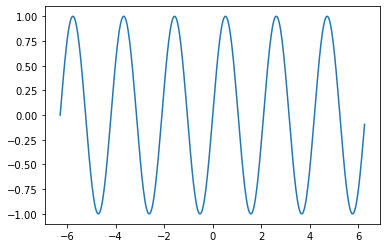

In [56]:
z = np.arange(-2*math.pi, 2*math.pi, math.pi/100)
y  =np.sin(3*z)
plt.plot(z,y)

C:\Users\asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


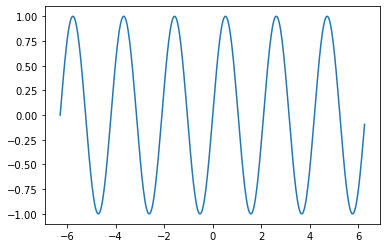

In [67]:
import scipy
z1 = scipy.fft.fft(y)
z2 = scipy.fft.ifft(z1)
plt.plot(z, z2)

In [59]:
print(y)

[ 7.34788079e-16  9.41083133e-02  1.87381315e-01  2.78991106e-01
  3.68124553e-01  4.53990500e-01  5.35826795e-01  6.12907054e-01
  6.84547106e-01  7.50111070e-01  8.09016994e-01  8.60742027e-01
  9.04827052e-01  9.40880769e-01  9.68583161e-01  9.87688341e-01
  9.98026728e-01  9.99506560e-01  9.92114701e-01  9.75916762e-01
  9.51056516e-01  9.17754626e-01  8.76306680e-01  8.27080574e-01
  7.70513243e-01  7.07106781e-01  6.37423990e-01  5.62083378e-01
  4.81753674e-01  3.97147891e-01  3.09016994e-01  2.18143241e-01
  1.25333234e-01  3.14107591e-02 -6.27905195e-02 -1.56434465e-01
 -2.48689887e-01 -3.38737920e-01 -4.25779292e-01 -5.09041416e-01
 -5.87785252e-01 -6.61311865e-01 -7.28968627e-01 -7.90155012e-01
 -8.44327926e-01 -8.91006524e-01 -9.29776486e-01 -9.60293686e-01
 -9.82287251e-01 -9.95561965e-01 -1.00000000e+00 -9.95561965e-01
 -9.82287251e-01 -9.60293686e-01 -9.29776486e-01 -8.91006524e-01
 -8.44327926e-01 -7.90155012e-01 -7.28968627e-01 -6.61311865e-01
 -5.87785252e-01 -5.09041

### Verificação passo a passo da conversão do Main BOA algorithm de R para python

In [1061]:
lon = np.array([1,2,3,4,5,6])
lat = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ingrid = np.arange(1,91).reshape(6, 15) 

In [1074]:
#======================================================#
# Main BOA algorithm                                   
#======================================================#

gx = np.matrix([[-1,0,1],[-2,0,2],[-1,0,1]])          #check  
gy = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])          #check
        
np.nan_to_num(ingrid, nan=-9999, posinf=-9999, neginf=-9999)         #check
        
grid5 = filt5(lon, lat, ingrid, nodata = np.nan)          #check
grid35 = filt3(lon, lat, ingrid, grid5)                   #check

# make an index of bad values and land pixels.
grid35 = grid35.astype("float")      
grid35[grid35 == -9999]=np.nan
naidx = np.isnan(grid35)  

# convert these to zeros for smoothing purposes
grid35[naidx]=0 

# perform the smoothing (Sobel filter)       #PRECISO CORRIGIR A FUNÇÃO FILTER2 PARA OBTER OS RESULTADOS ESPERADOS
tgx = filter2(grid35, gx)
tgy = filter2(grid35, gy)
        
tx = tgx/np.nansum(abs(np.array(gx).flatten()))
ty = tgy/np.nansum(abs(np.array(gy).flatten()))
front = np.sqrt((tx**2)+(ty**2))


#### Esta parte esta bem implementada (Main BOA algorithm)

Mas é necessário corrigir aquela parte na função filter2

### Verificação passo a passo da conversão de "Landmask and edge dilation" para Python

In [1090]:
#======================================================#
# landmask and edge dilation
#======================================================#

land = naidx*1
land = land.astype("float")
land[land==1] = np.nan
land[~np.isnan(land)] = 1


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

### Verificação passo a passo da conversão de "Landmask and edge dilation using raster" para Python

In [1173]:
#======================================================#
# landmask and edge dilation using raster!
#======================================================#

l1=lon.size                       #check
l2=lat.size                       #check


midx = land*np.nan                #check 


midx[2:(l1-1), 4:(l2-3)] = 1      #check

land = np.multiply(land, midx)     #check


####################################################### R code

#ssr = flip(raster((t(front))),2)
#Objects of class Extent are used to define the spatial extent(extremes) of objects of the Raster* classes.
#extent(ssr) = c(min(lon), max(lon), min(lat), max(lat)) -> CODE IN R


#mask = flip(focal(raster(t(land)), w = matrix(c(0,0,0,0,1,0,0,0,0), nrow=3, ncol=3)), direction = 2)
#extent(mask) = c(min(lon), max(lon), min(lat), max(lat))

#front = mask*ssr
####################################################


#################################################### Python code (TRY TO MAKE IT CLEANER)

#Código para criar um raster file (.tif) file in Python

#write the array front to a raster data file with 'w' mode
ssr = rasterio.open('ssr.tif', 'w', driver='GTiff', height = front.shape[1], 
                    width = front.shape[0], count = 1, dtype = front.dtype)

#To copy the grid (front matrix) to the opened dataset
ssr.write(np.flip(front.T, 0), 1)

# To sync data to disk and finish
ssr.close()

# Now in order to read the data (front matrix) stored inside the .tif file
#ssr = rasterio.open('ssr.tif', 'r')

# To access the matrix in the raster data
#matrix_ssr = ssr.read()

# To access the metadata of the .tif file
#ssr.meta

#Extent is a class in R used to define the spatial extent (extremes) of objects of raster classes 
#Class extent só existe em R portanto vou criar um vetor com os valores do extent em questão
extent_ssr = [min(lon), max(lon), min(lat), max(lat)]



#write the array mask to a raster data file with 'w' mode
mask = rasterio.open('mask.tif', 'w', driver='GTiff', height = land.shape[1], 
                    width = front.shape[0], count = 1, dtype = land.dtype)

#Apply the sliding window kernell to the land matrix
conv = signal.convolve2d(np.flip(land.T, 0), np.array([0,0,0,0,1,0,0,0,0]).reshape(3,3), boundary='symm', mode='same')

#To copy the grid (conv matrix) to the opened dataset
mask.write(conv, 1)

# To sync data to disk and finish
mask.close()

# Now in order to read the data (front matrix) stored inside the .tif file
#mask = rasterio.open('mask.tif', 'r')

# To access the matrix in the raster data
#mask_matrix = mask.read()

# To access the metadata of the .tif file
#mask.meta

extent_mask = [min(lon), max(lon), min(lat), max(lat)]


matrix_front = conv * np.flip(front.T, 0)      #matrix of mask raster file * matrix of ssr raster file
#matrix_front = matrix_ssr*matrix_mask
#matrix_front = matrix_front.reshape(15,6)      #outra forma de obter a matriz de cima

#write the array front to a raster data file with 'w' mode
front_raster = rasterio.open('front.tif', 'w', driver='GTiff', height = matrix_front.shape[0], 
                    width = matrix_front.shape[1], count = 1, dtype = front.dtype)

#To copy the grid (conv matrix) to the opened dataset
front_raster.write(matrix_front, 1)

# To sync data to disk and finish
front_raster.close()

extent_front = [min(lon), max(lon), min(lat), max(lat)]

# Now in order to read the data (front matrix) stored inside the .tif file
#front_raster = rasterio.open('front.tif', 'r')

# To access the matrix in the raster data
#front_matrix = front_raster.read()

# To access the metadata of the .tif file
#front_raster.meta




In [253]:
#Perceber melhor isto -> verificar se isto será importante no resto do código
from rasterio.transform import Affine
res = (lon[-1] - lon[0])/lon.shape[0]
transform = Affine.translation(lon[0] - res/2, lat[0] - res/2) * Affine.scale(res, res)
transform

Affine(0.8333333333333334, 0.0, 0.5833333333333333,
       0.0, 0.8333333333333334, 0.5833333333333333)

In [580]:
#write the array front to a raster data file with 'w' mode
ssr = rasterio.open('ssr.tif', 'w', driver='GTiff', height = front.shape[1], 
                    width = front.shape[0], count = 1, dtype = front.dtype)#, transform=transform)


## BOA in Python

Aqui é integrado todo o código pertencente à função boa

In [1172]:
def boa(lon, lat, ingrid, nodata = np.nan, direction = False):
    
    def filter2(x, filt):
        
        dx = x.shape                          
        df = filt.shape                       
        cx = tuple(elem//2 for elem in dx)    
        cf = tuple(elem//2 for elem in df)    

        wf = np.zeros(shape=dx)               

        wf[cx[0]-cf[0]-1:cx[0]+cf[0], cx[1]-cf[1]-1:cx[1]+cf[1]] = filt    

        wf = fft2(wf)                        
    
        dim_x = np.array(dx[0:2])
        dim_x =np.append(dim_x, math.prod(dx)/math.prod(dx[0:2]))     

        aux1 = np.arange(cx[0],dx[0]+1)
        aux2 = np.arange(1,cx[0])
        index1 = np.concatenate((aux1, aux2), axis=None)  
        index1 = index1-1

        aux3 = np.arange(cx[1], dx[1]+1)
        aux4 = np.arange(1,cx[1])
        index2 = np.concatenate((aux3, aux4), axis=None) 
        index2 = index2-1

        pdx = math.prod(dim_x[0:2])                                   
        
        y = fft2(((fft2(x) * wf))/pdx).real
        
        y = np.array([[y[i][j] for j in index2] for i in index1])
        
        return y
    
#O problema é que na função fft() em R há um parametro inverse=T que altera a ordem da matriz
# Não estou a conseguir arranjar forma de replicar os efeitos desse parametro no codigo em Python   
    
#======================================================#
# Main BOA algorithm                                   
#======================================================#      
    gx = np.matrix([[-1,0,1],[-2,0,2],[-1,0,1]])   
    gy = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])
        
    np.nan_to_num(ingrid, nan=-9999, posinf=-9999, neginf=-9999) ##replace NaN and inf values with -9999
        
    grid5 = filt5(lon, lat, ingrid, nodata = nodata)
    grid35 = filt3(lon, lat, ingrid, grid5)

    # make an index of bad values and land pixels.
    grid35 = grid35.astype("float")
    grid35[grid35 == -9999]=np.nan
    naidx = np.isnan(grid35)       
    # convert these to zeros for smoothing purposes
    grid35[naidx]=0  

    # perform the smoothing (Sobel filter)  
    tgx = filter2(grid35, gx)
    tgy = filter2(grid35, gy)
        
    tx = tgx/np.nansum(abs(np.array(gx).flatten()))
    ty = tgy/np.nansum(abs(np.array(gy).flatten()))
    front = np.sqrt((tx**2)+(ty**2))


#======================================================#
# landmask and edge dilation
#======================================================#

    land = naidx*1
    land = land.astype("float")

    land[land==1] = np.nan
    land[~np.isnan(land)] = 1

    
#======================================================#
# landmask and edge dilation using raster!
#======================================================#

    l1=lon.size    #using size because lon and lat are matrices
    l2=lat.size

    midx = land*np.nan

    midx[5:(l1-2), 5:(l2-2)] = 1

    land = np.multiply(land, midx)

    ########################################## Talvez arranjar um pouco mais o código
    
    #write the array front to a raster data file with 'w' mode
    ssr = rasterio.open('ssr.tif', 'w', driver='GTiff', height = front.shape[1], 
                        width = front.shape[0], count = 1, dtype = front.dtype)

    #To copy the grid (front matrix) to the opened dataset
    ssr.write(np.flip(front.T, 0), 1)

    # To sync data to disk and finish
    ssr.close()

    extent_ssr = [min(lon), max(lon), min(lat), max(lat)]



    #write the array mask to a raster data file with 'w' mode
    mask = rasterio.open('mask.tif', 'w', driver='GTiff', height = land.shape[1], 
                    width = front.shape[0], count = 1, dtype = land.dtype)

    #Apply the sliding window kernell to the land matrix
    conv = signal.convolve2d(np.flip(land.T, 0), np.array([0,0,0,0,1,0,0,0,0]).reshape(3,3), boundary='symm', mode='same')

    #To copy the grid (conv matrix) to the opened dataset
    mask.write(conv, 1)

    # To sync data to disk and finish
    mask.close()

    extent_mask = [min(lon), max(lon), min(lat), max(lat)]



    matrix_front =  conv * np.flip(front.T, 0)   #matrix of mask raster file * matrix of ssr raster file

    #write the array front to a raster data file with 'w' mode
    front_raster = rasterio.open('front.tif', 'w', driver='GTiff', height = matrix_front.shape[0], 
                    width = matrix_front.shape[1], count = 1, dtype = front.dtype)
    
    #To copy the grid (conv matrix) to the opened dataset
    front_raster.write(matrix_front, 1)

    # To sync data to disk and finish
    front_raster.close()
    
    extent_front = [min(lon), max(lon), min(lat), max(lat)]


    ####################################################


    if direction==True:
#   ************************************
#   *** Calculate Gradient Direction ***
#   ************************************
        
        n = ingrid.size       #nr os elements of the grid matrix

        GRAD_DIR = np.zeros(n)

        for i in range(n):
            GRAD_DIR[i] = math.atan2(tgy.flatten()[i], tgx.flatten()[i])
    
        GRAD_DIR = GRAD_DIR*180/math.pi

        OK = np.where(GRAD_DIR < 0)

        OK = np.array(OK)

        if OK.size >1:
            GRAD_DIR[OK] = 360 - abs(GRAD_DIR[OK])
    
        GRAD_DIR = (360 - GRAD_DIR + 90) % 360   
        GRAD_DIR = GRAD_DIR.reshape(6, 15)


        #write the array front to a raster data file with 'w' mode
        grad_dir = rasterio.open('grad_dir.tif', 'w', driver='GTiff', height = GRAD_DIR.shape[1], 
                            width = GRAD_DIR.shape[0], count = 1, dtype = GRAD_DIR.dtype)

        #To copy the grid (front matrix) to the opened dataset
        grad_dir.write(np.flip(GRAD_DIR.T, 0), 1)

        # To sync data to disk and finish
        grad_dir.close()

        extent_grad_dir = extent_front     ##extent_front AINDA NAO TA DEFINIDO

        # create array grdir (result from multiplication of grad_dir_matrix and mask_matrix (its the conv matrix))
        grdir_matrix = np.flip(GRAD_DIR.T, 0)*conv

        grdir = rasterio.open('grdir.tif', 'w', driver='GTiff', height = grdir_matrix.shape[0], 
                            width = grdir_matrix.shape[1], count = 1, dtype = grdir_matrix.dtype)

        grdir.write(grdir_matrix, 1)

        grdir.close()

        #No R eles pôem numa named_list por isso aqui pus num dicionário (algo equivalente)
        dic = {'grdir': grdir, 'front': front_raster}
        
    else:
        front_raster

        
return front_raster
    



SyntaxError: 'return' outside function (3222748305.py, line 203)

### Verificação passo a passo da conversão de "Calculate Gradient Direction" para Python

In [1189]:
#   ************************************
#   *** Calculate Gradient Direction ***
#   ************************************

n = ingrid.size       #nr os elements of the grid matrix
grid_shape = ingrid.shape

GRAD_DIR = np.zeros(n)

for i in range(n):
    GRAD_DIR[i] = math.atan2(tgy.flatten()[i], tgx.flatten()[i])

#GRAD_DIR = GRAD_DIR.reshape(grid_shape)
    
GRAD_DIR = GRAD_DIR*180/math.pi

OK = np.where(GRAD_DIR < 0)

OK = np.array(OK).flatten()

if OK.size >1:
    GRAD_DIR[OK] = 360 - abs(GRAD_DIR[OK])
    
GRAD_DIR = (360 - GRAD_DIR + 90) % 360   
GRAD_DIR = GRAD_DIR.reshape(grid_shape)


#write the array front to a raster data file with 'w' mode
grad_dir = rasterio.open('grad_dir.tif', 'w', driver='GTiff', height = GRAD_DIR.shape[1], 
                    width = GRAD_DIR.shape[0], count = 1, dtype = GRAD_DIR.dtype)

#To copy the grid (front matrix) to the opened dataset
grad_dir.write(np.flip(GRAD_DIR.T, 0), 1)

# To sync data to disk and finish
grad_dir.close()

extent_grad_dir = extent_front

grdir_matrix = np.flip(GRAD_DIR.T, 0)*conv

grdir = rasterio.open('grdir.tif', 'w', driver='GTiff', height = grdir_matrix.shape[0], 
                    width = grdir_matrix.shape[1], count = 1, dtype = grdir_matrix.dtype)

grdir.write(grdir_matrix, 1)

grdir.close()

#No R eles pôem numa named_list por isso aqui pus num dicionário (algo equivalente)
dic = {'grdir': grdir, 'front': front_raster}